In [1]:
import pandas as pd
import numpy as np
import os
import re
import pyodbc
import sqlalchemy
import urllib
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import sqlite3
import pyodbc
import transliterate
from slugify import slugify
from sqlalchemy import create_engine

In [5]:
os.getcwd()

'd:\\project\\Minnib_project\\SCHED_PATTERNS\\reports\\plan_drilling'

In [2]:
os.chdir(r'd:\project\Minnib_project\SCHED_PATTERNS\reports\plan_drilling')

In [3]:
connection_string = (
    r'DRIVER={Microsoft Access Driver (*.mdb, *.accdb)};'
    r'DBQ=d:\project\Minnib_project\MINN_KPRA.accdb;'
    r'ExtendedAnsiSQL=1;'
)
connection_uri = f"access+pyodbc:///?odbc_connect={urllib.parse.quote_plus(connection_string)}"
acc_eng = create_engine(connection_uri)

In [4]:
def resview_colls(df):
    new_coll = []
    for x in df.columns:
        x =x.replace('\n', '')
        new_coll.append(x)
    df.columns=new_coll
    return df

### Преобразование режимных данных из Армитса в формат навигатора

In [5]:
prod_regims=pd.read_sql('prod_rejims', con=acc_eng)

d:\other\my_software\python\lib\site-packages\sqlalchemy\engine\reflection.py:805: SAWarning:

The Access ODBC driver does not support the ODBC "SQLPrimaryKeys" function. get_pk_constraint() is returning an empty list.

d:\other\my_software\python\lib\site-packages\sqlalchemy\engine\reflection.py:833: SAWarning:

The Access ODBC driver does not support the ODBC "SQLForeignKeys" function. get_foreign_keys() is returning an empty list.



In [6]:
import transliterate
from slugify import slugify
transliterate.translit('Привет Как Дела?', reversed=True)

'Privet Kak Dela?'

In [7]:
for i in prod_regims.columns:
    prod_regims[i][prod_regims[i].apply(lambda i: True if re.search('^s*$', str(i)) else False)]=None

d:\other\my_software\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
#prod_regims.drop(index = prod_regims.tail(11).index, inplace=True)

In [9]:
prod_regims.drop(index = prod_regims.loc[prod_regims['Пл']!=905].index, inplace=True)

In [10]:
prod_regims['ДНС']='ДНС_'+prod_regims['ДНС']
prod_regims['ГЗУ']='ГЗУ_'+prod_regims['ГЗУ']

In [11]:
prod_regims['ДНС'].fillna('НД'+prod_regims['ОТП'], inplace=True)
prod_regims['ГЗУ'].fillna('НГ'+prod_regims['ДНС'], inplace=True)

In [12]:
prod_regims['groups']=prod_regims['ГЗУ']

In [13]:
prod_regims['Скваж']=prod_regims['Скваж'].astype('str')

In [14]:
cols=['Скваж', 'ОТП', 'ДНС', 'ГЗУ', 'groups']
for col in cols:
    prod_regims[col]=prod_regims[col].apply(lambda x: slugify(x, lowercase=False) if isinstance(x, str) else x)

In [15]:
prod_regims['Qн_ф'].sum()

4212.943

In [16]:
prod_regims['Qн_пр'].sum()

TypeError: must be str, not int

In [17]:
prod_regims['Скваж'] = prod_regims['Скваж'].str.split('-', expand=True)[0]

In [18]:
prod_regims.loc[prod_regims['Скваж']=='9589', 'Qж_пр']

786     18.39
787    125.81
Name: Qж_пр, dtype: object

In [19]:
prod_regims.loc[prod_regims['ДНС'].isnull()]

,Код,Цех,Актив,Скваж,Мест,Уч,Пл,Бл,Гор,Прим_спс,...,Рз_дин,Рз_ст,Тип_ск,Lхода,Nкач,Рбуф,Dp_пот_опт_заб,DQн_пот_опт_неф,Кпод_недостов,groups
868,869,2.0,1,14924,1.0,None,905.0,1.0,531.0,ОРЭ,...,NaN,44.1,None,NaN,NaN,3.0,NaN,NaN,None,NaN
1036,1037,2.0,1,20379,1.0,None,905.0,NaN,531.0,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN
2566,2567,5.0,1,230D,1.0,None,905.0,4.0,529.0,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN
2594,2595,5.0,1,681,1.0,None,905.0,6.0,531.0,БС,...,NaN,NaN,"СК8-3,5-4000",NaN,NaN,NaN,NaN,NaN,None,NaN
2638,2639,5.0,1,9519A,1.0,None,905.0,NaN,531.0,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN
2656,2657,5.0,1,9607A,1.0,None,905.0,NaN,531.0,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN
2668,2669,5.0,1,9635A,1.0,None,905.0,NaN,531.0,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN
2716,2717,5.0,1,14979A,1.0,None,905.0,NaN,531.0,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN
2823,2824,5.0,1,20217,1.0,None,905.0,NaN,531.0,None,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN
2828,2829,5.0,1,20223,1.0,None,905.0,3.0,531.0,None,...,NaN,32.2,None,NaN,NaN,90.0,NaN,NaN,None,NaN


# Выгрузка данных для модели

In [45]:
import os
print(os.getcwd())

d:\project\Minnib_project\SCHED_PATTERNS\reports\plan_drilling


In [46]:
for i in prod_regims.columns:
    prod_regims[i][prod_regims[i].apply(lambda i: True if re.search('^s*$', str(i)) else False)]=None

d:\other\my_software\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
with open ('welspeck_Prod.inc', 'w', newline='') as w:
    w.write('WELSPECS \n -- wname  gname  iw  jw  ref.depth  phase  radius  inflow_flag  shut-in_flag  crossflow_ability_flag  PVT_n  density_type  filt.tbl  reserved  reserved  well_model_type  polymer_mixing_tbl\n')
    for x,y in prod_regims.groupby('Скваж'):
        w.write("'{0}' {1} 2* /\n".format(x,y['groups'].agg(lambda x: x.iloc[0])))
    w.write('/')    

In [48]:
with open ('worklist.inc', 'w', newline='') as w:
    counter=0
    w.write("WLIST\n'*list_name' NEW ")
    for x,y in prod_regims.groupby('Скваж'):
        counter+=1
        if counter%50!=0:
            w.write('{0} '.format(x))
        else:
            w.write("\n '*list_name' ADD {0} ".format(x))
    w.write('/')   

In [49]:
with open ('WCONPROD.inc', 'w', newline='') as w:
    w.write('WCONPROD \n -- wname  status  control  orate  wrate  grate  lrate  lrate(rc)  BHP  THP  VFP_n  ALQ  wgrate  mlrate  steam  sat.pressure  sat.temperature  calorific_rate  linearly_combined_rate  NGL_rate\n')
    for x,y in prod_regims[['Скваж','Qж_пр']].groupby('Скваж'):
        w.write("'{0}' OPEN LRAT 3* {1} 1* 50 /\n".format(x,y['Qж_пр'].sum()))
    w.write('/')

In [51]:
with open ('grouptree_Prod.inc', 'w', newline='') as w:
    w.write('GRUPTREE\n')
    for x,y in prod_regims.groupby('ДНС'):
        for tp in y['ГЗУ'].unique():
            w.write("{1} {0} /\n".format(x,tp))
    for x,y in prod_regims.groupby('ОТП'):
        for tp in y['ДНС'].unique():
            w.write("{1} {0} /\n".format(x,tp))
    w.write('/')    

In [65]:
PPD = pd.read_sql('inj_rejums', con=acc_eng)

d:\other\my_software\python\lib\site-packages\sqlalchemy\engine\reflection.py:805: SAWarning:

The Access ODBC driver does not support the ODBC "SQLPrimaryKeys" function. get_pk_constraint() is returning an empty list.

d:\other\my_software\python\lib\site-packages\sqlalchemy\engine\reflection.py:833: SAWarning:

The Access ODBC driver does not support the ODBC "SQLForeignKeys" function. get_foreign_keys() is returning an empty list.



In [66]:
PPD.drop(index =PPD[PPD['Пл']!=905].index, inplace=True)

In [67]:
PPD.loc[~PPD['ТП'].isin(['МТП', 'ТТП', 'УПТЖ для ППД', 'ЦПС','САТП', 'Сторонние предп']), ['ТП']]='MSP'
PPD.loc[~PPD['ТП'].isin(['МТП', 'ТТП', 'УПТЖ для ППД', 'ЦПС','САТП', 'Сторонние предп']), ['ТП']]='MSP'

In [68]:
cols=['Скваж', 'ТП', 'ОТП', 'КНС']
for col in cols:
    PPD[col]=PPD[col].apply(lambda x: slugify(x, lowercase=False) if isinstance(x, str) else x)

In [69]:
PPD['КНС']='KNS_'+PPD['КНС']

In [70]:
for i in prod_regims.columns:
    prod_regims[i][prod_regims[i].apply(lambda i: True if re.search('^s*$', str(i)) else False)]=None

d:\other\my_software\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
PPD

,Код,Цех,Скваж,ТП,ОТП,КНС,Врп,Вдв,Бриг,Агент_предл,...,Р_уст,Dшт_скв,Q_факт,Q_предл,Qпр_уч_КНС,Q_техн,Рпл,Рзаб,К_прод,Д_раб
0,1,8.0,2,MTP,MOS,KNS_11,,14.0,2.0,Ст.в.,...,120.0,NaN,45.6,17.0,0.51,17.0,197.0,295.0,0.290,1.0
1,2,8.0,8N,MTP,MOS,KNS_4,,8.0,2.0,Ст.в.,...,94.0,4.0,271.2,NaN,NaN,165.0,232.0,283.0,1.270,NaN
2,3,8.0,11D,TTP,TOS,KNS_243BL,,6.0,5.0,Ст.в.,...,114.0,NaN,21.6,20.0,15.88,20.0,233.0,288.0,0.440,28.0
3,4,8.0,15,UPTZh-dlia-PPD,2V-P-BIG-VOS,KNS_6,62,95.0,5.0,Пр.в.,...,102.0,NaN,2.4,50.0,48.02,100.0,182.0,275.0,1.050,28.0
4,5,15.0,27,MSP,20121,KNS_20121,,1.0,5.0,Пл.в.,...,113.0,NaN,88.8,110.0,104.74,110.0,199.0,301.0,0.605,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2201,8.0,32773,TTP,TOS,KNS_15,151,83.0,5.0,Ст.в.,...,102.0,NaN,2.4,2.0,1.76,2.0,192.0,295.0,0.020,28.0
2201,2202,8.0,32788-1,TTP,TOS,KNS_15,,9.0,5.0,Ст.в.,...,98.0,NaN,10.0,NaN,NaN,10.0,173.0,288.0,0.550,NaN
2202,2203,8.0,32788-2,TTP,TOS,KNS_15,,9.0,5.0,Ст.в.,...,110.0,NaN,67.0,NaN,NaN,67.0,175.0,286.0,1.030,NaN
2203,2204,8.0,32793-1,TTP,TOS,KNS_243BL,2432,92.0,5.0,Ст.в.,...,102.0,NaN,10.0,NaN,NaN,10.0,172.0,275.0,1.503,NaN


In [72]:
PPD['Скваж']=PPD['Скваж'].astype('str')
PPD['КНС']=PPD['КНС'].astype('str')

In [73]:
PPD['Скваж'] = PPD['Скваж'].str.split('-', expand=True)[0]

In [74]:
PPD['ТП'].unique()

array(['MTP', 'TTP', 'UPTZh-dlia-PPD', 'MSP', 'TsPS', 'SATP'],
      dtype=object)

In [75]:
PPD.columns

Index(['Код', 'Цех', 'Скваж', 'ТП', 'ОТП', 'КНС', 'Врп', 'Вдв', 'Бриг',
       'Агент_предл', 'Мест', 'Уч', 'Пл', 'Бл', 'Гор', '% распр', 'Пласты',
       'Р_вык', 'Р_бг', 'Р_уст', 'Dшт_скв', 'Q_факт', 'Q_предл', 'Qпр_уч_КНС',
       'Q_техн', 'Рпл', 'Рзаб', 'К_прод', 'Д_раб'],
      dtype='object')

In [76]:
with open ('welspeckPPD.inc', 'w', newline='') as w:
    w.write('WELSPECS \n -- wname  gname  iw  jw  ref.depth  phase  radius  inflow_flag  shut-in_flag  crossflow_ability_flag  PVT_n  density_type  filt.tbl  reserved  reserved  well_model_type  polymer_mixing_tbl\n')
    for x,y in PPD.groupby('Скваж'):
        w.write("'{0}' {1} 2* /\n".format(x,y['КНС'].agg(lambda x: x.iloc[0])))
    w.write('/')    

In [77]:
with open ('grouptree.inc', 'w', newline='') as w:
    w.write('GRUPTREE\n')
    for x,y in PPD.groupby('ТП'):
        for tp in y['КНС'].unique():
            w.write("{1} {0} /\n".format(x,tp))
    w.write('/')    

In [78]:
with open ('WCONINJ.inc', 'w', newline='') as w:
    w.write('WCONINJE \n -- wname  status  control  orate  wrate  grate  lrate  lrate(rc)  BHP  THP  VFP_n  ALQ  wgrate  mlrate  steam  sat.pressure  sat.temperature  calorific_rate  linearly_combined_rate  NGL_rate\n')
    for x,y in PPD.groupby('Скваж'):
        w.write("'{0}'  WATER OPEN RATE {1} / /\n".format(x,y['Q_предл'].sum()))
    w.write('/')

# Преобразование данных проектной сетки скважин в формат навигатора

In [36]:
from glob import glob

In [42]:
os.chdir(r'd:\project\Minnib_project\SCHED_PATTERNS\reports\plan_drilling\reports')

In [38]:
files = sorted(glob(r'*.txt'))

In [39]:
import re
def deshifr(text):
    text=str(text)
    regexp1 = re.compile(r'S\d{3}')
    model = regexp1.search(text)
    return model.group() if model!=None else 'Base'

def set_dash(text):
    text = text.replace("W", "P") if text.startswith('W') else text
    return text[0]+'_'+text[1:]

def deshifr_name(text):
    text=str(text)
    regexp = re.compile(r'I.*|W.*')
    model = regexp.search(text)
    return set_dash(model.group() if model!=None else 'P'+text)

def type_well(text):
    return f'I' if 'I' in text else f'P'

def type_file(text):
    text=str(text).split('.')
    return text[0]

    

In [43]:
def correct_frame(grid_file):
    frame = pd.read_table(grid_file,sep='\s', names=['well', 'y', 'x'])
    frame['file'] = type_file(grid_file)
    return frame

In [72]:
#pd.read_table('200.txt',sep='\s', names=['well', 'x', 'y'])
first_frame = pd.concat((correct_frame(i) for i in files[0:-1]), ignore_index=True)

d:\other\my_software\python\lib\site-packages\ipykernel_launcher.py:2: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [73]:
first_frame['y_r'] = first_frame['x']-6000000-21000
first_frame['x_r'] = first_frame['y']-2300000+9000
first_frame['x'], first_frame['y'] = first_frame['x_r'], first_frame['y_r']
first_frame.drop(columns = ['x_r', 'y_r'], inplace=True)

In [74]:
fact_wells = pd.read_table(files[-1],sep='\s', usecols=[0, 7, 8], names=['well', 'x', 'y'], skiprows=1)
fact_wells['file'] = 'fact'

d:\other\my_software\python\lib\site-packages\ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [75]:
first_frame = pd.concat([first_frame, fact_wells], ignore_index=True)

In [77]:
first_frame['Тип'] = first_frame['well'].apply(type_well)

In [80]:
well_name(first_frame)

,index,well,y,x,file,Тип,Ближайшие скважины,Расстояние,Ствол скважины
0,0,1000I,49470.00,34721.00,200,I,0,NaN,I-0
1,1,1001P,49470.00,34921.00,200,P,0,NaN,P-1
2,2,1002I,49470.00,35121.00,200,I,0,NaN,I-2
3,3,1003P,49470.00,35321.00,200,P,0,NaN,P-3
4,4,1004I,49470.00,35521.00,200,I,0,NaN,I-4
...,...,...,...,...,...,...,...,...,...
18638,18638,32793,48893.45,33276.25,fact,P,0,NaN,P-18638
18639,18639,32794,49999.18,31706.88,fact,P,0,NaN,P-18639
18640,18640,32795,50294.03,32320.50,fact,P,0,NaN,P-18640
18641,18641,39304,36112.63,20653.12,fact,P,0,NaN,P-18641


In [96]:
def distance_filter(wells, param, flag, flag2, limit): #flag-по какому параметру будем чистить
    wells['Ближайшие скважины']=0
    wells['Расстояние'] = np.nan
    for i, j in wells[(wells['x'].notnull())&(wells['y'].notnull())&(wells[param]==flag)].groupby(by='Ствол скважины'):
        x = int(wells.loc[wells['Ствол скважины']==i, 'x'].values)
        y = int(wells.loc[wells['Ствол скважины']==i, 'y'].values)
        wells['sum'] = (abs(wells.loc[wells[param]==flag2, 'x']-x)**2+abs(wells.loc[wells[param]==flag2,'y']-y)**2)**0.5
        wells.loc[wells['Ствол скважины']==i, 'Расстояние'] = wells['sum'].min()
        a = wells.sort_values(by='sum', ascending=True)['well'].head(1).to_list()
        nearest_wells = ', '.join([str(elem) for elem in a])
        wells.loc[wells['Ствол скважины']==i, 'Ближайшие скважины'] = nearest_wells 
        wells.drop(index=wells.loc[wells['Расстояние']<limit].index, inplace=True)

In [97]:
for grids in ['200', '250', '300']:
    distance_filter(first_frame, 'file', grids, 'fact', int(grids))

In [102]:
for a, b in first_frame.groupby('file'):
    with open (f'welltrack_{a}.inc', 'w', newline='') as w:
        for x,y in b.groupby('Ствол скважины'):
            w.write("WELLTRACK '{0}' \n {1} {2} 0 0 \n {3} {4} 3000 3000\n /\n".format(x,y['x'].min(),y['y'].min(),y['x'].max(),y['y'].max()))
        w.write('/')
    with open (f'compdat_{a}.inc', 'w', newline='') as w:
        w.write('COMPDATMD\n -- wname	branch	mdu	mdl	type	status	filt.tbl.	pi	diameter	kh	skin	D-factor	mult	DP\n')    
        for x,y in b.groupby('Ствол скважины'):
            w.write("'{0}' 	1*	0	1480	1*	OPEN	2*	0.336	1*	20	1*	1	/\n".format(x))
        w.write('/')
    with open (f'wellist_{a}.inc', 'w', newline='') as w:
        counter=0
        w.write("WLIST\n'*list_name' NEW ")
        for x,y in b.groupby('Ствол скважины'):
            counter+=1
            if counter%50!=0:
                w.write('{0} '.format(x))
            else:
                w.write("\n '*list_name' ADD {0} ".format(x))
        w.write('/')
    with open (f'welspeck_{a}.inc', 'w', newline='') as w:
        w.write('WELSPECS \n -- wname  gname  iw  jw  ref.depth  phase  radius  inflow_flag  shut-in_flag  crossflow_ability_flag  PVT_n  density_type  filt.tbl  reserved  reserved  well_model_type  polymer_mixing_tbl\n')
        for x,y in b.groupby('Ствол скважины'):
            w.write('"{0}" {1} 2* /\n'.format(x,y['Тип'].min()))
        w.write('/')   

# Обработка расчетов по сеткам и запись в файл

In [43]:
well_grid = '300'
project = pd.read_excel('PROJECT WELLS.xlsx', sheet_name=well_grid)

In [44]:
well_type_dict = {'I':'I', 'W':'P'}

In [45]:
project = resview_colls(project)

In [46]:
project['Модель'] = project['Модель'].str.split(' ').str[1]

In [47]:
grids = project.groupby('Модель')

In [48]:
def well_name(df):
    df.reset_index(inplace=True)
    df['Ствол скважины'] = df['Тип'].astype('str')+'-'+df['index'].astype('str')
    return df

In [49]:
project

,Модель,Скважина,Ствол скважины,Тип,Назначение,Форма,Дата заложения,"Альтитуда, м","X (устье), м","Y (устье), м","X1, м","Y1, м","Z1, м","X3, м","Y3, м","Z3, м"
0,300,I-13089,I-13089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35721,47070,NaN,NaN,NaN,NaN
1,300,I-13099,I-13099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15621,46770,NaN,NaN,NaN,NaN
2,300,I-13147,I-13147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28821,46770,NaN,NaN,NaN,NaN
3,300,I-13154,I-13154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30621,46770,NaN,NaN,NaN,NaN
4,300,I-13169,I-13169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34821,46770,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,300,P-16430,P-16430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22821,51270,NaN,NaN,NaN,NaN
401,300,P-16496,P-16496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24621,51270,NaN,NaN,NaN,NaN
402,300,P-16526,P-16526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28521,47370,NaN,NaN,NaN,NaN
403,300,P-16553,P-16553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35721,47370,NaN,NaN,NaN,NaN


# Запасы по скважинам

In [16]:
well_oil = pd.read_table('rezultat400.txt', usecols=[0, 3, 6, 7, 8, 9, 11, 12, 13, 14, 15],names=['well', 'D0', 'D1a', 'D1b1', 'D1b2', 'D1b', 'D1v', 'D1g1', 'D1g2', 'D1g3', 'D1d'], decimal=b',', )

In [17]:
index_col=['well', 'D0', 'D1a', 'D1b1', 'D1b2', 'D1b', 'D1v', 'D1g1', 'D1g2', 'D1g3', 'D1d']

In [18]:
well_oil

,well,D0,D1a,D1b1,D1b2,D1b,D1v,D1g1,D1g2,D1g3,D1d
0,'I-2852',6276676.9,5949581.1,2243897.3,3939554.6,6438436.3,6152390.0,14283768.9,6742910.2,928269.7,9969.3
1,'9587',4513.7,6507.2,278.1,1505.6,4382.3,4509.8,3330.8,1603.8,0.0,0
2,'9Н',2626.8,0,26.8,1199.6,338.0,5091.8,4334.7,22658.1,510.4,0.0
3,'20383',13095.2,5076.3,7.7,10.1,4214.1,6576.6,2428.1,9640.3,1178.4,7.7
4,'122',4530.6,5227.6,3649.1,5817.7,255.2,4784.9,369.1,2289.1,1606.6,0
...,...,...,...,...,...,...,...,...,...,...,...
3077,'P-910',370.0,2845.6,0,4832.0,809.8,109.0,243.8,446.2,0.0,0
3078,'P-97',485.6,2994.2,837.9,1160.0,1738.7,301.0,12437.1,565.4,867.5,0
3079,'P-98',0,4366.4,1758.0,894.0,6240.3,642.4,7345.3,1417.8,426.4,0
3080,'P-99',2514.5,3228.3,448.6,0,2708.3,5101.8,20467.8,3118.1,1787.7,0


In [19]:
well_oil['well']=well_oil['well'].str.replace("'", "")

In [20]:
well_oil.columns = index_col

In [21]:
well_oil.index = well_oil['well']
well_oil.drop(columns='well', inplace=True)

In [22]:
#well_oil = pd.DataFrame(well_oil.stack())

In [23]:
well_oil=well_oil.astype('float')

In [24]:
well_oil['zapas']=well_oil.sum(axis=1)

In [25]:
#well_oil.reset_index().groupby('well')[0].sum()
project2 = project#pd.merge(left=project, right=well_oil.reset_index().groupby('well')[0].sum(), left_on='Ствол скважины', right_index=True)

NameError: name 'project' is not defined

In [29]:
well_oil.to_sql('well_STOIP', con=acc_eng, if_exists = 'replace')

In [67]:
df#.groupby(df.index)['qo', 'summo', 'summl','wwir', 'wwit', 'init_press', 'delta_press_final'].mean() 

,date,lpt,lpr,opt,opr,wwir,wwit,press
well,,,,,,,,
9587,2020-01-01,345285.561829,29.18046,156369.051806,20.189162,0.0,0.0,122.404328
9587,2020-02-01,345606.869203,12.20000,156534.131916,6.492155,0.0,0.0,138.527247
9587,2020-03-01,345907.447069,12.20000,156696.505090,6.590481,0.0,0.0,140.720007
9587,2020-04-01,346228.754443,12.20000,156871.040366,6.627082,0.0,0.0,142.055832
9587,2020-05-01,346539.697063,12.20000,157040.321286,6.641827,0.0,0.0,142.905764
...,...,...,...,...,...,...,...,...
P-997,2034-09-01,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000
P-997,2034-10-01,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000
P-997,2034-11-01,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.000000


In [68]:
project2 = pd.merge(left=well_oil, 
                    right=df.groupby(df.index)['qo', 'summo', 'summl','wwir', 'wwit', 'init_press', 'delta_press_final'].mean(), 
                    left_index=True, right_index=True)

d:\other\my_software\python\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



KeyError: "Columns not found: 'summl', 'delta_press_final', 'qo', 'init_press', 'summo'"

In [69]:
#project2.to_sql('plan_wells', con=engine, if_exists = 'append')
project2.to_excel(f'well_zapas_succsess.xlsx')

In [70]:
econ = pd.read_excel('400_years_economic.xlsx', sheet_name='пул расчет', skiprows=3)

In [71]:
econ['grid']=400

In [72]:
econ.drop(index = econ[econ['№скв.']=='-'].index, inplace=True)

In [76]:
econ.to_sql('economic', con=con, if_exists = 'replace')#.to_excel(f'well_zapas_{well_grid}.xlsx')

d:\other\my_software\python\lib\site-packages\pandas\core\generic.py:2663: UserWarning:

The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.



DatabaseError: Execution failed on sql 'SELECT name FROM sqlite_master WHERE type='table' AND name=?;': ('42S02', '[42S02] [Microsoft][Драйвер ODBC Microsoft Access] Ядру СУБД Microsoft Access не удается найти входную таблицу или запрос "sqlite_master". Убедитесь, что объект существует, а его имя указано правильно. (-1305) (SQLExecDirectW)')

In [144]:
cluster_prod = pd.read_excel('Product_wells_from_orange.xlsx')

In [145]:
clusters = {
    'C1':'сверхуспешные',
    'C2':'успешные',
    'C3':'неуспешные_обводнение',
    'C4':'неуспешные давление'
}

In [146]:
cluster_prod['Cluster'] = cluster_prod['Cluster'].map(clusters)

In [147]:
cluster_prod

,Feature 1,index,Модель,Тип,"X1, м","Y1, м",zapas,qo,summo,summl,...,init_press,delta_press_final,WOR,Source ID,Скважина,Ствол скважины,Selected,Cluster,Silhouette,Selected (1)
0,761,761,250,P,13107,41457,405.0,NaN,0.000000,1.296772,...,NaN,NaN,1.296772,well_zapas_250,W28643,P-761,No,неуспешные давление,0.575317,Yes
1,768,768,250,P,13232,41207,1700.5,NaN,2.661771,5.984295,...,NaN,NaN,0.907355,well_zapas_250,W28712,P-768,No,неуспешные давление,0.578229,No
2,769,769,250,P,13232,41707,1600.0,NaN,0.000000,0.357867,...,NaN,NaN,0.357867,well_zapas_250,W28714,P-769,No,неуспешные давление,0.578831,No
3,770,770,250,P,13357,41957,12986.0,16.908977,11001.968902,124743.873291,...,172.199695,40.849265,10.337383,well_zapas_250,W28715,P-770,No,неуспешные давление,0.580008,No
4,771,771,250,P,13357,42457,7716.4,3.359383,3893.400016,63151.487424,...,172.016782,48.860504,15.216230,well_zapas_250,W28717,P-771,No,неуспешные давление,0.592843,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,1532,1532,300,P,35632,48707,10198.8,3.866590,9361.287440,167920.642184,...,206.990806,-3.320833,16.935963,well_zapas_300,W39748,P-1532,No,неуспешные давление,0.508337,No
4657,1533,1533,300,P,35482,49007,13104.8,6.033104,11315.211838,390308.631829,...,196.328228,-4.326878,33.491192,well_zapas_300,W39749,P-1533,No,неуспешные_обводнение,0.509302,No
4658,1534,1534,300,P,35782,49007,7051.0,5.218288,3015.807012,92870.936773,...,182.729264,-9.602340,29.784845,well_zapas_300,W39808,P-1534,No,неуспешные_обводнение,0.545239,No
4659,1535,1535,300,P,35932,49307,11139.3,7.670564,16287.328686,373177.658258,...,180.412503,0.179131,21.910801,well_zapas_300,W39809,P-1535,No,успешные,0.520600,No


In [148]:
cluster_prod.to_sql('clusters', con=engine, if_exists = 'replace')#.to_excel(f'well_zapas_{well_grid}.xlsx')

In [149]:
cluster_inj = pd.read_excel('inject_wells_from_orange.xlsx')

In [150]:
clusters = {
    'C1':'бесполезные',
    'C2':'запасов немного но закачивают',
    'C3':'обеспеченные запасами и много закачивают',
}

In [151]:
cluster_inj['Cluster'] = cluster_inj['Cluster'].map(clusters)

In [152]:
cluster_inj.to_sql('clusters', con=engine, if_exists = 'replace')#.to_excel(f'well_zapas_{well_grid}.xlsx')

# Обработка финальной сетки. Выполняется единожды и нехер сюда лезть пока финальную сетку не собрал

In [220]:
import re
from openpyxl import load_workbook

In [221]:
os.chdir(r'd:\project\Minnib_project\SCHED_PATTERNS\reports\plan_drilling')

In [222]:
excel_file = load_workbook('all_succsess_in_one.xlsx')

In [223]:
t=[ i for i in excel_file.get_sheet_names()]#] if 'PPD' not in i]

d:\other\my_software\python\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated function get_sheet_names (Use wb.sheetnames).



In [224]:
wells = pd.concat((pd.read_excel('all_succsess_in_one.xlsx', sheet_name=i) for i in t), ignore_index=True)

In [225]:
wells.rename(columns={'Unnamed: 2':'Тип'}, inplace=True)

In [234]:
wells['Тип'].value_counts()

I    803
P    684
Name: Тип, dtype: int64

In [227]:
well_name(wells)

,index,well,key,Тип,сетка,Unnamed: 4,x,y,qo,oil,liq,dP,ИДДЗ,Ствол скважины
0,0,P-5592,P-5592,P,200,200,34121,40270,40.0,158.252041,498.333938,5.414788,1.767975,P-0
1,1,P-355,P-355,P,200,200,37121,48870,40.0,157.107618,219.323142,37.203067,1.767318,P-1
2,2,P-5817,P-5817,P,200,200,33721,39870,40.0,173.754056,398.247520,-11.210511,1.756197,P-2
3,3,P-3160,P-3160,P,200,200,34521,44270,40.0,133.379725,195.621028,24.794941,1.752356,P-3
4,4,P-3041,P-3041,P,200,200,35921,44470,40.0,124.829231,409.852999,52.678092,1.749403,P-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,3308,I-16463,I-16463,I,300,300,23721,51270,NaN,0.000000,0.000000,133.464986,0.000000,I-3308
3309,3309,I-16477,I-16477,I,300,300,36921,47670,NaN,0.000000,0.000000,120.765202,0.000000,I-3309
3310,3310,I-16480,I-16480,I,300,300,16221,47370,NaN,0.000000,0.000000,123.817270,0.000000,I-3310
3311,3311,I-16485,I-16485,I,300,300,24321,51270,NaN,0.000000,0.000000,131.243070,0.000000,I-3311


In [228]:
wells['well']=wells['Ствол скважины']

In [229]:
#wells = wells.loc[wells['сетка']==200]

In [136]:
#wells.loc[wells['Расстояние']<200]

In [137]:
#wells.loc[wells['well']=='P-152']

In [231]:
wells['Ближайшие скважины']=0
wells['Расстояние'] = np.nan
for grids in wells['сетка'].unique():
    for i, j in wells[(wells['x'].notnull())&(wells['y'].notnull())&(wells['Тип']=='I')&(wells['сетка']==grids)].groupby(by='well'):
        x = int(wells.loc[wells['well']==i, 'x'].values)
        y = int(wells.loc[wells['well']==i, 'y'].values)
        wells['sum'] = abs(wells.loc[(wells['Тип']!='I')&(wells['сетка']==grids), 'x']-x)+abs((wells.loc[(wells['Тип']!='I')&(wells['сетка']==grids),'y']-y))
        wells.loc[wells['well']==i, 'Расстояние'] = wells['sum'].min()
        a = wells.sort_values(by='sum', ascending=True)['well'].head(1).to_list()
        nearest_wells = ', '.join([str(elem) for elem in a])
        wells.loc[wells['well']==i, 'Ближайшие скважины'] = nearest_wells 
        wells.drop(index=wells.loc[wells['Расстояние']>grids].index, inplace=True)

In [232]:
wells['Ближайшие скважины']=0
wells['Расстояние'] = np.nan
for wells_grid in [250, 300]:
    for i, j in wells[(wells['x'].notnull())&(wells['y'].notnull())&(wells['сетка']==wells_grid)].groupby(by='well'):
            x = int(wells.loc[wells['well']==i, 'x'].values)
            y = int(wells.loc[wells['well']==i, 'y'].values)
            wells['sum'] = abs(wells.loc[wells['сетка']<wells_grid, 'x']-x)+abs(wells.loc[wells['сетка']<wells_grid,'y']-y)
            wells.loc[wells['well']==i, 'Расстояние'] = wells['sum'].min()
            a = wells.sort_values(by='sum', ascending=True)['well'].head(1).to_list()
            nearest_wells = ', '.join([str(elem) for elem in a])
            wells.loc[wells['well']==i, 'Ближайшие скважины'] = nearest_wells 
            wells.drop(index=wells.loc[wells['Расстояние']<wells_grid].index, inplace=True)

In [140]:
wells_not_in_field=['I-2326', 'I-2327', 'I-2402', 'I-2403', 'I-2420', 'I-2421', 'I-2437', 'I-2439', 'I-2440', 'I-2443', 'I-2444', 'I-2455', 'I-2456', 'I-2458', 'I-2459', 'I-2460', 'I-2464', 'I-2465', 'I-2466', 'I-2467', 'I-2477', 'I-2481', 'I-2482', 'I-2483', 'I-2484', 'I-2495', 'I-2496', 'I-2497', 'I-2508', 'I-2509', 'I-2510', 'I-2511', 'I-2515', 'I-2516', 'I-2520', 'I-2521', 'I-2522', 'I-2527', 'I-2528', 'I-2531', 'I-2533', 'I-2970', 'I-3036', 'I-3049', 'I-3052', 'I-3262', 'P-36', 'P-39', 'P-78', 'P-85', 'P-88', 'P-93', 'P-119', 'P-166', 'P-199', 'P-224', 'P-245', 'P-263', 'P-265', 'P-279', 'P-282', 'P-327', 'P-349', 'P-363', 'P-392', 'P-398', 'P-437', 'P-453', 'P-454', 'P-462', 'P-485', 'P-490', 'P-523', 'P-552', 'P-557', 'P-558', 'P-588', 'P-599', 'P-603', 'P-615', 'P-624', 'P-635', 'P-839', 'P-845', 'P-1016', 'I-1986', 'I-2023', 'I-2046', 'I-2047', 'I-2048', 'I-2086', 'I-2110', 'I-2137', 'I-2138', 'I-2162', 'I-2187', 'I-2212', 'I-2213', 'I-2214', 'I-2215', 'I-2240', 'I-2241', 'I-2242', 'I-2243', 'I-2266', 'I-2267', 'I-2268', 'I-2269', 'I-2292', 'I-2293', 'I-2294', 'I-2295', 'I-2315', 'I-2316', 'I-2317', 'I-2340', 'I-2341', 'I-2343', 'I-2367', 'I-2368', 'I-2369', 'I-2370', 'I-2372', 'I-2393', 'I-2395', 'I-2413', 'I-2416', 'I-2417', 'I-2418', 'I-2428', 'I-2431', 'I-2432', 'I-2433', 'I-2434', 'I-2435', 'I-2449', 'I-2450', 'I-2451', 'I-2452', 'I-2453', 'I-2454', 'I-2471', 'I-2472', 'I-2473', 'I-2485', 'I-2489', 'I-2498', 'I-2499', 'I-2501', 'I-2502', 'I-2512', 'I-2513', 'I-2523', 'I-2524', 'I-2525', 'I-2869', 'I-2985', 'I-3014', 'I-3022', 'I-3023', 'I-3032', 'I-3038', 'I-3039', 'P-0', 'P-2', 'P-9', 'P-11', 'P-13', 'P-15', 'P-22', 'P-29', 'P-42', 'P-75', 'P-90', 'P-91', 'P-92', 'P-101', 'P-120', 'P-121', 'P-124', 'P-128', 'P-144', 'P-151', 'P-159', 'P-165', 'P-177', 'P-193', 'P-198', 'P-214', 'P-241', 'P-246', 'P-257', 'P-261', 'P-289', 'P-291', 'P-322', 'P-324', 'P-330', 'P-338', 'P-359', 'P-361', 'P-374', 'P-375', 'P-389', 'P-395', 'P-406', 'P-431', 'P-439', 'P-441', 'P-447', 'P-451', 'P-457', 'P-471', 'P-472', 'P-525', 'P-543', 'P-568', 'P-597', 'P-606', 'P-610', 'P-613', 'P-622', 'P-623', 'I-1524', 'I-1541', 'I-1542', 'I-1557', 'I-1579', 'I-1580', 'I-1603', 'I-1604', 'I-1605', 'I-1642', 'I-1662', 'I-1701', 'I-1702', 'I-1724', 'I-1745', 'I-1764', 'I-1765', 'I-1782', 'I-1806', 'I-1831', 'I-1877', 'I-1878', 'I-1879', 'I-1902', 'I-1903', 'I-1952', 'I-1971', 'I-3185', 'P-3', 'P-4', 'P-5', 'P-12', 'P-14', 'P-16', 'P-20', 'P-28', 'P-33', 'P-37', 'P-38', 'P-40', 'P-44', 'P-51', 'P-64', 'P-69', 'P-72', 'P-77', 'P-86', 'P-96', 'P-114', 'P-133', 'P-146', 'P-194', 'P-288', 'P-317', 'P-344', 'P-371', 'P-425', 'P-482', 'P-486', 'P-500', 'P-580', 'P-680', 'I-1781', 'I-1523', 'P-188', 'I-1023', 'I-1024', 'I-1047', 'I-1070', 'I-1190', 'I-1219', 'I-1220', 'I-1221', 'I-1259', 'I-1260', 'I-1281', 'I-1282', 'I-1283', 'I-1301', 'I-1302', 'I-1326', 'I-1327', 'I-1353', 'I-1381', 'I-1405', 'I-1406', 'I-1428', 'I-1429', 'I-1430', 'I-1449', 'I-1471', 'I-1496', 'I-1497', 'P-1', 'P-17', 'P-21', 'P-26', 'P-27', 'P-30', 'P-52', 'P-55', 'P-58', 'P-63', 'P-95', 'P-105', 'P-123', 'P-127', 'P-137', 'P-152', 'P-155', 'P-192', 'P-211', 'P-221', 'P-232', 'P-277', 'P-309', 'P-312', 'P-434', 'P-514', 'P-539', 'P-650', 'I-1165', 'I-1189', 'I-1241', 'P-504', 'P-524', 'I-1609', 'I-1921', 'I-2089', 'I-2336', 'P-87', 'P-132', 'P-136', 'P-281', 'P-302', 'I-1090', 'I-1203', 'I-1206', 'P-542', 'I-1027', 'I-1419', 'I-1816', 'I-1996', 'P-103', 'P-153', 'P-179', 'P-554', 'P-691', 'I-1072', 'I-1094', 'I-1096', 'I-1113', 'I-1119', 'I-1123', 'I-1167', 'I-1218', 'I-1233', 'I-1324', 'I-1330', 'I-1333', 'I-1347', 'I-1350', 'I-1473', 'I-1480', 'I-1505', 'I-1629', 'I-1632', 'I-1959', 'I-2109', 'I-2113', 'I-2363', 'I-2371', 'I-2378', 'I-2385', 'I-2540', 'I-2555', 'I-2563', 'I-2564', 'I-2565', 'I-2636', 'I-2691', 'I-2791', 'I-2866', 'I-3078', 'P-94', 'P-115', 'P-215', 'P-240', 'P-255', 'P-268', 'P-284', 'P-301', 'P-328', 'P-334', 'P-346', 'P-396', 'P-397', 'P-405', 'P-426', 'P-429', 'P-432', 'P-452', 'P-460', 'P-521', 'P-534', 'P-549', 'P-571', 'P-583', 'P-596', 'P-634', 'P-831', 'P-889', 'P-987', 'I-1242', 'I-1261', 'I-1284', 'I-1285', 'I-1304', 'P-220', 'P-235', 'P-336', 'I-1499', 'I-1543', 'I-1559', 'P-278', 'P-299', 'P-387', 'I-1763', 'I-1805', 'P-647', 'I-1022', 'I-1045', 'I-2325', 'I-2537', 'I-2559', 'P-560']

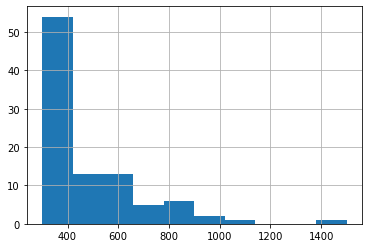

In [233]:
wells['Расстояние'].loc[wells['Расстояние'].notnull()].hist()

In [235]:
wells.drop(index = wells.loc[wells['well'].isin(wells_not_in_field)].index, inplace=True)

### тут убираю неэффективные скважины ППД

In [236]:
noneff = ['I-2172', 'I-1161', 'I-2054', 'I-1529', 'I-1690', 'I-1028', 'I-1029', 'I-1035', 'I-1036', 'I-1039', 'I-1042', 'I-1044', 'I-1055', 'I-1056', 'I-1059', 'I-1060', 'I-1061', 'I-1069', 'I-1074', 'I-1078', 'I-1079', 'I-1080', 'I-1081', 'I-1083', 'I-1087', 'I-1088', 'I-1091', 'I-1102', 'I-1103', 'I-1105', 'I-1110', 'I-1112', 'I-1115', 'I-1116', 'I-1117', 'I-1121', 'I-1126', 'I-1127', 'I-1133', 'I-1134', 'I-1136', 'I-1137', 'I-1138', 'I-1139', 'I-1145', 'I-1148', 'I-1149', 'I-1150', 'I-1152', 'I-1155', 'I-1158', 'I-1159', 'I-1160', 'I-1163', 'I-1164', 'I-1169', 'I-1171', 'I-1172', 'I-1173', 'I-1177', 'I-1181', 'I-1183', 'I-1186', 'I-1191', 'I-1198', 'I-1199', 'I-1201', 'I-1210', 'I-1215', 'I-1231', 'I-1236', 'I-1237', 'I-1239', 'I-1247', 'I-1248', 'I-1252', 'I-1253', 'I-1256', 'I-1257', 'I-1264', 'I-1273', 'I-1275', 'I-1277', 'I-1278', 'I-1279', 'I-1286', 'I-1288', 'I-1299', 'I-1300', 'I-1306', 'I-1316', 'I-1318', 'I-1321', 'I-1322', 'I-1323', 'I-1341', 'I-1342', 'I-1344', 'I-1348', 'I-1349', 'I-1360', 'I-1374', 'I-1375', 'I-1376', 'I-1377', 'I-1378', 'I-1379', 'I-1394', 'I-1401', 'I-1403', 'I-1404', 'I-1422', 'I-1424', 'I-1426', 'I-1427', 'I-1432', 'I-1444', 'I-1445', 'I-1447', 'I-1450', 'I-1452', 'I-1457', 'I-1466', 'I-1468', 'I-1469', 'I-1474', 'I-1486', 'I-1490', 'I-1494', 'I-1510', 'I-1513', 'I-1519', 'I-1522', 'I-1526', 'I-1534', 'I-1535', 'I-1538', 'I-1545', 'I-1546', 'I-1553', 'I-1561', 'I-1563', 'I-1568', 'I-1574', 'I-1586', 'I-1588', 'I-1590', 'I-1600', 'I-1602', 'I-1619', 'I-1623', 'I-1627', 'I-1640', 'I-1647', 'I-1648', 'I-1649', 'I-1650', 'I-1651', 'I-1652', 'I-1655', 'I-1661', 'I-1668', 'I-1669', 'I-1670', 'I-1671', 'I-1675', 'I-1676', 'I-1682', 'I-1685', 'I-1687', 'I-1691', 'I-1694', 'I-1707', 'I-1708', 'I-1714', 'I-1715', 'I-1718', 'I-1730', 'I-1737', 'I-1738', 'I-1749', 'I-1758', 'I-1779', 'I-1787', 'I-1789', 'I-1796', 'I-1799', 'I-1802', 'I-1803', 'I-1808', 'I-1810', 'I-1811', 'I-1812', 'I-1813', 'I-1823', 'I-1825', 'I-1832', 'I-1833', 'I-1834', 'I-1835', 'I-1836', 'I-1837', 'I-1840', 'I-1845', 'I-1846', 'I-1847', 'I-1849', 'I-1857', 'I-1858', 'I-1859', 'I-1865', 'I-1869', 'I-1870', 'I-1873', 'I-1886', 'I-1890', 'I-1894', 'I-1898', 'I-1899', 'I-1907', 'I-1908', 'I-1916', 'I-1920', 'I-1922', 'I-1923', 'I-1925', 'I-1933', 'I-1938', 'I-1946', 'I-1953', 'I-1955', 'I-1956', 'I-1957', 'I-1960', 'I-1964', 'I-1966', 'I-1970', 'I-1972', 'I-1973', 'I-1977', 'I-1980', 'I-1981', 'I-1985', 'I-1988', 'I-1989', 'I-1994', 'I-1995', 'I-2005', 'I-2007', 'I-2015', 'I-2018', 'I-2020', 'I-2027', 'I-2032', 'I-2036', 'I-2039', 'I-2040', 'I-2044', 'I-2050', 'I-2051', 'I-2052', 'I-2057', 'I-2060', 'I-2061', 'I-2062', 'I-2063', 'I-2064', 'I-2068', 'I-2071', 'I-2074', 'I-2079', 'I-2080', 'I-2081', 'I-2084', 'I-2090', 'I-2092', 'I-2094', 'I-2101', 'I-2102', 'I-2103', 'I-2104', 'I-2107', 'I-2114', 'I-2117', 'I-2120', 'I-2123', 'I-2126', 'I-2127', 'I-2128', 'I-2129', 'I-2131', 'I-2132', 'I-2136', 'I-2147', 'I-2148', 'I-2149', 'I-2150', 'I-2151', 'I-2155', 'I-2157', 'I-2160', 'I-2161', 'I-2169', 'I-2171', 'I-2173', 'I-2174', 'I-2177', 'I-2178', 'I-2179', 'I-2180', 'I-2181', 'I-2182', 'I-2185', 'I-2186', 'I-2196', 'I-2203', 'I-2204', 'I-2206', 'I-2207', 'I-2208', 'I-2211', 'I-2222', 'I-2223', 'I-2224', 'I-2227', 'I-2228', 'I-2231', 'I-2234', 'I-2236', 'I-2237', 'I-2238', 'I-2249', 'I-2250', 'I-2251', 'I-2252', 'I-2253', 'I-2262', 'I-2263', 'I-2264', 'I-2276', 'I-2279', 'I-2280', 'I-2281', 'I-2283', 'I-2288', 'I-2289', 'I-2290', 'I-2291', 'I-2299', 'I-2300', 'I-2304', 'I-2305', 'I-2306', 'I-2308', 'I-2309', 'I-2312', 'I-2313', 'I-2314', 'I-2321', 'I-2331', 'I-2332', 'I-2333', 'I-2334', 'I-2337', 'I-2338', 'I-2359', 'I-2360', 'I-2361', 'I-2362', 'I-2389', 'I-2390', 'I-2391', 'I-2392', 'I-2401', 'I-2409', 'I-2446', 'I-2476', 'I-2478', 'I-2488', 'I-2500', 'I-2507', 'I-2514', 'I-2536', 'I-2542', 'I-2543', 'I-2544', 'I-2549', 'I-2550', 'I-2551', 'I-2552', 'I-2556', 'I-2557', 'I-2566', 'I-2568', 'I-2569', 'I-2571', 'I-2573', 'I-2574', 'I-2613', 'I-2627', 'I-2647', 'I-2657', 'I-2667', 'I-2668', 'I-2681', 'I-2778', 'I-2798', 'I-2800', 'I-2804', 'I-2805', 'I-2817', 'I-2826', 'I-2831', 'I-2839', 'I-2848', 'I-2865', 'I-2876', 'I-2951', 'I-2974', 'I-3054', 'I-3086', 'I-3092', 'I-3102', 'I-3104', 'I-3188', 'I-3255']

In [237]:
wells.drop(index = wells.loc[wells['well'].isin(noneff)].index, inplace=True)

In [238]:
wells.to_excel('all_succsess_in_one2.xlsx', sheet_name='after_filter')

In [145]:
project = wells

def deshifr(text):
    text=str(text)
    regexp1 = re.compile(r'S\d{3}')
    model = regexp1.search(text)
    return model.group() if model!=None else 'Base'

def set_dash(text):
    text = text.replace("W", "P") if text.startswith('W') else text
    return text[0]+'_'+text[1:]

def deshifr_name(text):
    text=str(text)
    regexp = re.compile(r'I.*|W.*')
    model = regexp.search(text)
    return set_dash(model.group() if model!=None else 'P'+text)

def type_well(text):
    return 'I' if 'I' in text else 'P'
project['Ствол скважины'] = project['Скважина'].apply(deshifr_name)
project['Модель'] = project['Скважина'].apply(deshifr)
project['Тип'] = project['Ствол скважины'].apply(type_well)

In [146]:
a='400'

In [147]:
def wells_import(a, b):
    with open (f'welltrack_{a}.inc', 'w', newline='') as w:
        for x,y in b.groupby('Ствол скважины'):
            w.write("WELLTRACK '{0}' \n {1} {2} 0 0 \n {3} {4} 3000 3000\n /\n".format(x,y['x'].min(),y['y'].min(),y['x'].max(),y['y'].max()))
        w.write('/')
    with open (f'compdat_{a}.inc', 'w', newline='') as w:
        w.write('COMPDATMD\n -- wname	branch	mdu	mdl	type	status	filt.tbl.	pi	diameter	kh	skin	D-factor	mult	DP\n')    
        for x,y in b.groupby('Ствол скважины'):
            w.write("'{0}' 	1*	0	1480	1*	OPEN	2*	0.336	1*	20	1*	1	/\n".format(x))
        w.write('/')
    with open (f'wellist_{a}.inc', 'w', newline='') as w:
        counter=0
        w.write("WLIST\n'*list_name' NEW ")
        for x,y in b.groupby('Ствол скважины'):
            counter+=1
            if counter%50!=0:
                w.write('{0} '.format(x))
            else:
                w.write("\n '*list_name' ADD {0} ".format(x))
        w.write('/')
    with open (f'welspeck_{a}.inc', 'w', newline='') as w:
        w.write('WELSPECS \n -- wname  gname  iw  jw  ref.depth  phase  radius  inflow_flag  shut-in_flag  crossflow_ability_flag  PVT_n  density_type  filt.tbl  reserved  reserved  well_model_type  polymer_mixing_tbl\n')
        for x,y in b.groupby('Ствол скважины'):
            w.write('"{0}" {1} 2* /\n'.format(x,y['Тип'].min()))
        w.write('/')   

In [148]:
wells_import(a, wells)

In [245]:
wells.loc[:, ['well', 'x', 'y']].to_json('wells_Min.json', orient="records")

In [ ]:
wells.to_json()